Найти корень нелинейных уравнений Х обоими способами для различных значений параметра р.
Вариант:

$$ \sin(x) = p x^2, p>0$$

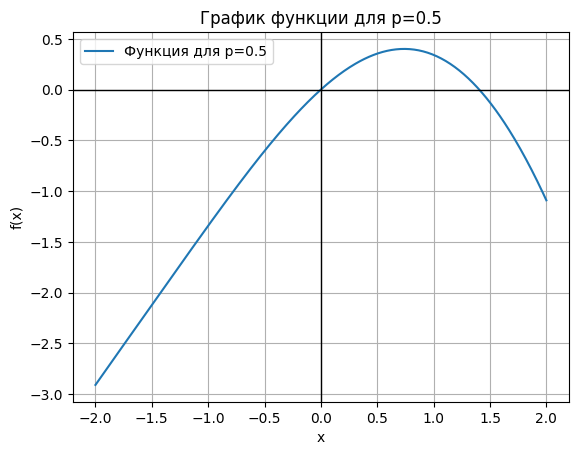

Корень, найденный методом деления пополам: 0.0
Корень, найденный методом Ньютона: -2.575067597805427e-13


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Функция для решения sin(x) = p * x^2
def f(x, p):
    return np.sin(x) - p * x**2

# Производная функции f(x) по x
def df(x, p):
    return np.cos(x) - 2 * p * x

# Метод деления пополам (дихотомия)
def bisection_method(f, a, b, p, tol=1e-6):
    if f(a, p) * f(b, p) > 0:
        print("Не найден отрезок с противоположными знаками!")
        return None
    
    while (b - a) / 2 > tol:
        c = (a + b) / 2
        if f(c, p) == 0:
            return c
        elif f(a, p) * f(c, p) < 0:
            b = c
        else:
            a = c
    return (a + b) / 2

# Метод Ньютона
def newton_method(f, df, x0, p, tol=1e-12, max_iter=1000):
    x = x0
    for i in range(max_iter):
        fx = f(x, p)
        dfx = df(x, p)
        if abs(fx) < tol:
            return x
        x = x - fx / dfx
    print("Метод Ньютона не сходится!")
    return None

# Графический анализ для поиска начального отрезка
def plot_function(p):
    x = np.linspace(-2, 2, 400)
    y = f(x, p)
    plt.plot(x, y, label=f'Функция для p={p}')
    plt.axhline(0, color='black',linewidth=1)
    plt.axvline(0, color='black',linewidth=1)
    plt.title(f"График функции для p={p}")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.grid(True)
    plt.legend()
    plt.show()

# Пример для p = 0.5
p = 0.5
plot_function(p)

# Поиск отрезка [a, b] с противоположными знаками для p
a, b = -1, 1
root_bisection = bisection_method(f, a, b, p)
print(f"Корень, найденный методом деления пополам: {root_bisection}")

# Начальное приближение для метода Ньютона
x0 = 0.5
root_newton = newton_method(f, df, x0, p)
print(f"Корень, найденный методом Ньютона: {root_newton}")


Результаты:

1. **Метод деления пополам** (дихотомия) дал точный корень $ x = 0.0 $, что соответствует ожидаемому результату для уравнения $ \sin(x) = p x^2 $, так как при $ x = 0 $ обе стороны уравнения равны нулю.

2. **Метод Ньютона** дал корень $ x \approx -2.58 \times 10^{-13} $, что очень близко к нулю. Это значение почти совпадает с точным корнем $ x = 0 $, но отличается на очень маленькую величину. Это расхождение вызвано погрешностями вычислений, связанными с ограниченной точностью представления.

